In [1]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 80
min_pair_overs = 16  # 1/5th of min_overs

In [2]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/T20out.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
len(qbovercnt)

45

In [3]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/T20pair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,1,1,ST Finn,10,0,2,SCJ Broad
1,12,1,3,ST Finn,5,0,4,GP Swann
2,4,1,5,LJ Wright,6,1,6,GP Swann
3,3,1,7,JW Dernbach,18,0,8,SCJ Broad
4,0,1,1,C Sutthiruang,0,0,2,R Padunglerd
...,...,...,...,...,...,...,...,...
13241,7,0,9,ST Jayasuriya,11,0,10,TM Dilshan
13242,3,1,11,ST Jayasuriya,20,0,12,TM Dilshan
13243,3,1,13,BAW Mendis,9,0,14,HMCM Bandara
13244,6,0,15,BAW Mendis,7,1,16,ST Jayasuriya


In [4]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())

In [5]:
#names = og_data['bowler'].unique()
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

len(Bpartners)

45

In [6]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1

A Shrubsole KH Brunt 31
AD Mathews KMDN Kulasekara 25
DJ Bravo SJ Benn 20
EA Perry ML Schutt 29
GH Dockrell KJ O'Brien 18
GH Dockrell WB Rankin 16
JL Jonassen ML Schutt 17
KMDN Kulasekara SL Malinga 23
M Kapp S Ismail 35
Mashrafe Mortaza Shakib Al Hasan 16
Mohammad Hafeez Shahid Afridi 40
Mohammad Nabi Rashid Khan 18
Nida Dar Sadia Yousuf 29
Poonam Yadav RP Yadav 20
R Ashwin RA Jadeja 19
Saeed Ajmal Umar Gul 25
Saeed Ajmal Shahid Afridi 30
Shahid Afridi Shoaib Malik 19


In [7]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

#Bpartner_qualified.keys()

28
{'A Shrubsole': ['KH Brunt'], 'AD Mathews': ['KMDN Kulasekara'], 'DJ Bravo': ['SJ Benn'], 'EA Perry': ['ML Schutt'], 'GH Dockrell': ["KJ O'Brien", 'WB Rankin'], 'JL Jonassen': ['ML Schutt'], 'KH Brunt': ['A Shrubsole'], 'KMDN Kulasekara': ['SL Malinga', 'AD Mathews'], 'M Kapp': ['S Ismail'], 'ML Schutt': ['JL Jonassen', 'EA Perry'], 'Mashrafe Mortaza': ['Shakib Al Hasan'], 'Mohammad Hafeez': ['Shahid Afridi'], 'Mohammad Nabi': ['Rashid Khan'], 'Nida Dar': ['Sadia Yousuf'], 'Poonam Yadav': ['RP Yadav'], 'R Ashwin': ['RA Jadeja'], 'RA Jadeja': ['R Ashwin'], 'Rashid Khan': ['Mohammad Nabi'], 'Rumana Ahmed': ['Fahima Khatun', 'Khadija Tul Kubra'], 'S Ismail': ['M Kapp'], 'SL Malinga': ['KMDN Kulasekara'], 'Saeed Ajmal': ['Umar Gul', 'Shahid Afridi'], 'Salma Khatun': ['Jahanara Alam'], 'Sana Mir': ['Sadia Yousuf'], 'Shahid Afridi': ['Saeed Ajmal', 'Shoaib Malik', 'Mohammad Hafeez'], 'Shakib Al Hasan': ['Mashrafe Mortaza', 'Mustafizur Rahman', 'Mahmudullah'], 'Umar Gul': ['Saeed Ajmal'], 

In [8]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
2630,4,1,1,GH Dockrell,4,0,2,WB Rankin
2631,3,1,3,GH Dockrell,0,1,4,WB Rankin
6529,8,0,11,GH Dockrell,4,1,12,WB Rankin
7158,8,0,9,GH Dockrell,2,0,10,WB Rankin
9125,7,0,18,GH Dockrell,6,1,19,WB Rankin
12479,7,0,11,GH Dockrell,4,0,12,WB Rankin
12482,17,0,17,GH Dockrell,3,1,18,WB Rankin


In [9]:
Bowlers_x = []
Bowlership_x = []
Bowler_Econ = []
Bowlership_Econ = []

Bowlers_x_knot = []
Bowlership_x_knot = []
Bowler_Econ_knot = []
Bowlership_Econ_knot = []


from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:

        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())
        
        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d
        
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        
        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha):
            print(name,",",pname)
            Bowlers_x.append(name)
            Bowlership_x.append(name + "-" + pname)
            Bowler_Econ.append(be)
            Bowlership_Econ.append(bse)
            
        else:
            Bowlers_x_knot.append(name)
            Bowlership_x_knot.append(name + "-" + pname)
            Bowler_Econ_knot.append(be)
            Bowlership_Econ_knot.append(bse)
        

A Shrubsole , KH Brunt
AD Mathews , KMDN Kulasekara
DJ Bravo , SJ Benn
EA Perry , ML Schutt
GH Dockrell , KJ O'Brien
GH Dockrell , WB Rankin
JL Jonassen , ML Schutt
KH Brunt , A Shrubsole
KMDN Kulasekara , SL Malinga
KMDN Kulasekara , AD Mathews
M Kapp , S Ismail
ML Schutt , JL Jonassen
ML Schutt , EA Perry
Mashrafe Mortaza , Shakib Al Hasan
Mohammad Nabi , Rashid Khan
Nida Dar , Sadia Yousuf
Poonam Yadav , RP Yadav
R Ashwin , RA Jadeja
RA Jadeja , R Ashwin
Rumana Ahmed , Fahima Khatun
Rumana Ahmed , Khadija Tul Kubra
S Ismail , M Kapp
SL Malinga , KMDN Kulasekara
Saeed Ajmal , Umar Gul
Sana Mir , Sadia Yousuf
Shahid Afridi , Saeed Ajmal
Shahid Afridi , Shoaib Malik
Shahid Afridi , Mohammad Hafeez
Shakib Al Hasan , Mashrafe Mortaza
Shakib Al Hasan , Mustafizur Rahman
Shakib Al Hasan , Mahmudullah
Umar Gul , Saeed Ajmal
WB Rankin , GH Dockrell
WB Rankin , DT Johnston


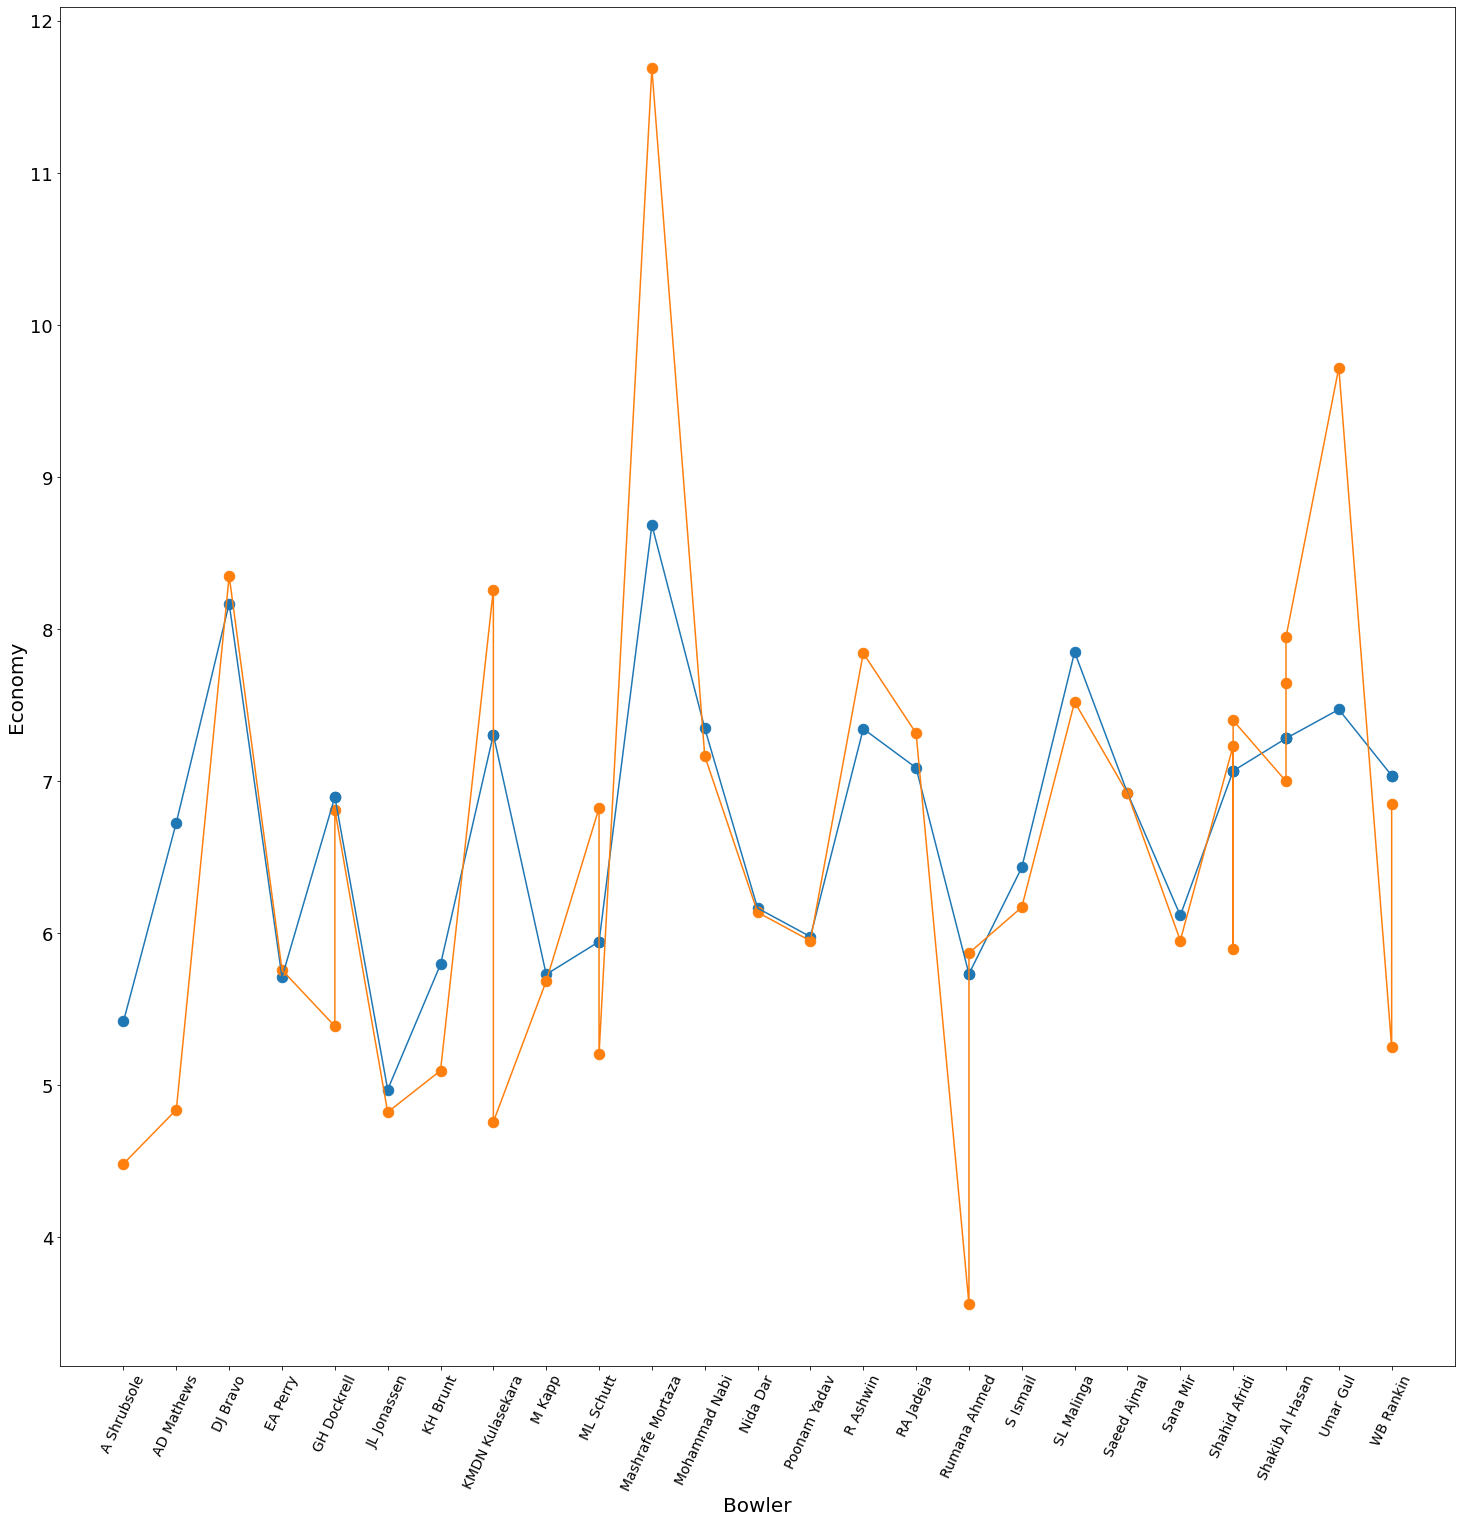

In [15]:
import matplotlib
from matplotlib import rc, rcParams

Bowler_set = list(set(Bowlers_x))
Econ_set = list(set(Bowler_Econ))

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ, Bowlership_Econ]:
    ax.scatter(Bowlers_x, Y, s=110)
    plt.plot(Bowlers_x, Y)

plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/T20I/bowlership-eco-scatter-t20.png', dpi=300, bbox_inches='tight', transparent = True)

In [16]:
bowler_improv = list(np.array(Bowler_Econ) - np.array(Bowlership_Econ))
bowler_improv = list(100*np.array(bowler_improv)/np.array(Bowler_Econ))

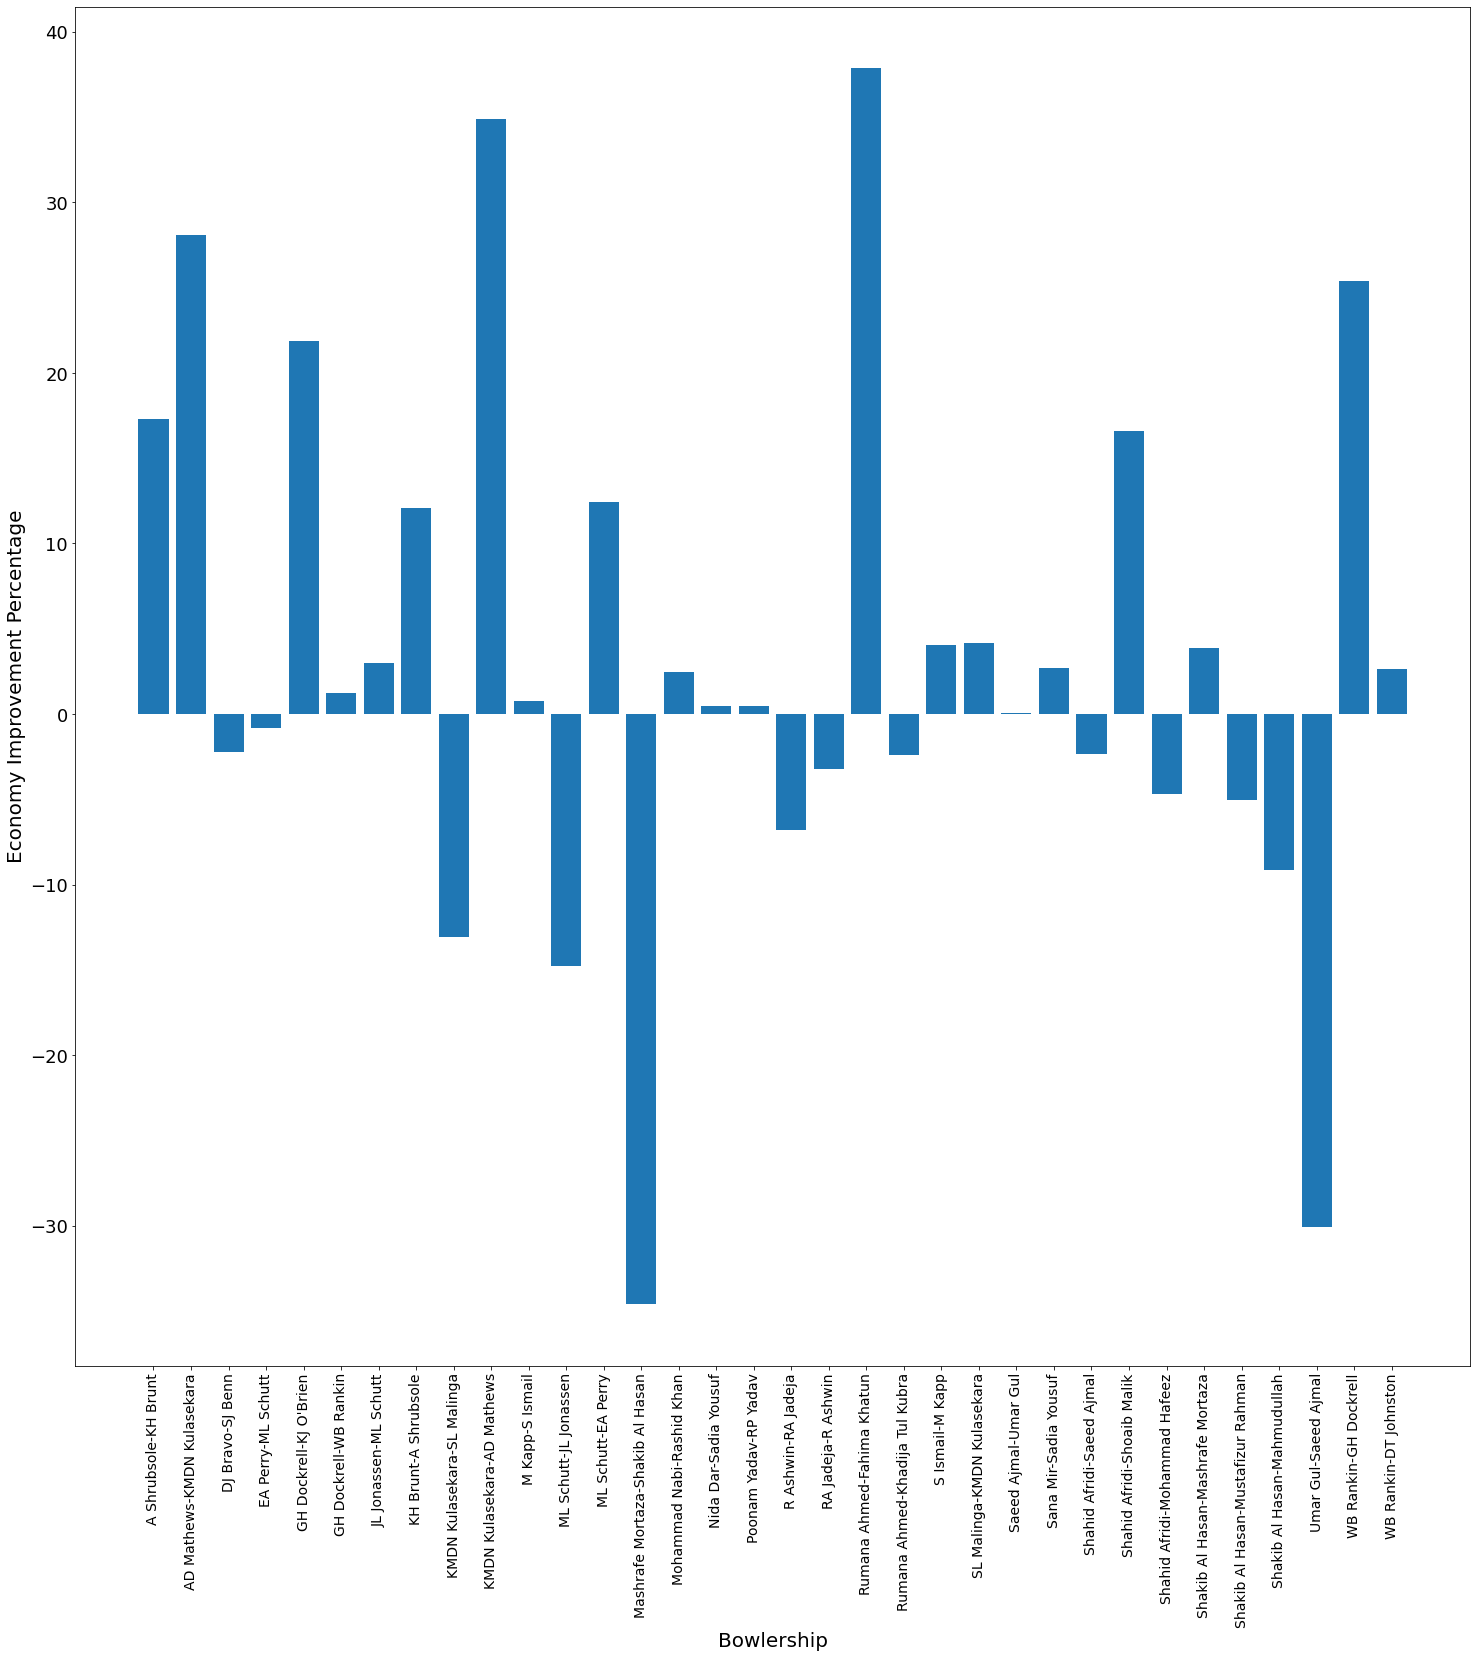

In [17]:
import matplotlib
from matplotlib import rc, rcParams

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowlership",fontsize = 20)
plt.ylabel("Economy Improvement Percentage", fontsize = 20)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=18)

plt.bar(Bowlership_x, bowler_improv)
plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/T20I/bowlership-%-improv-t20.png', dpi=300, bbox_inches='tight', transparent = True)



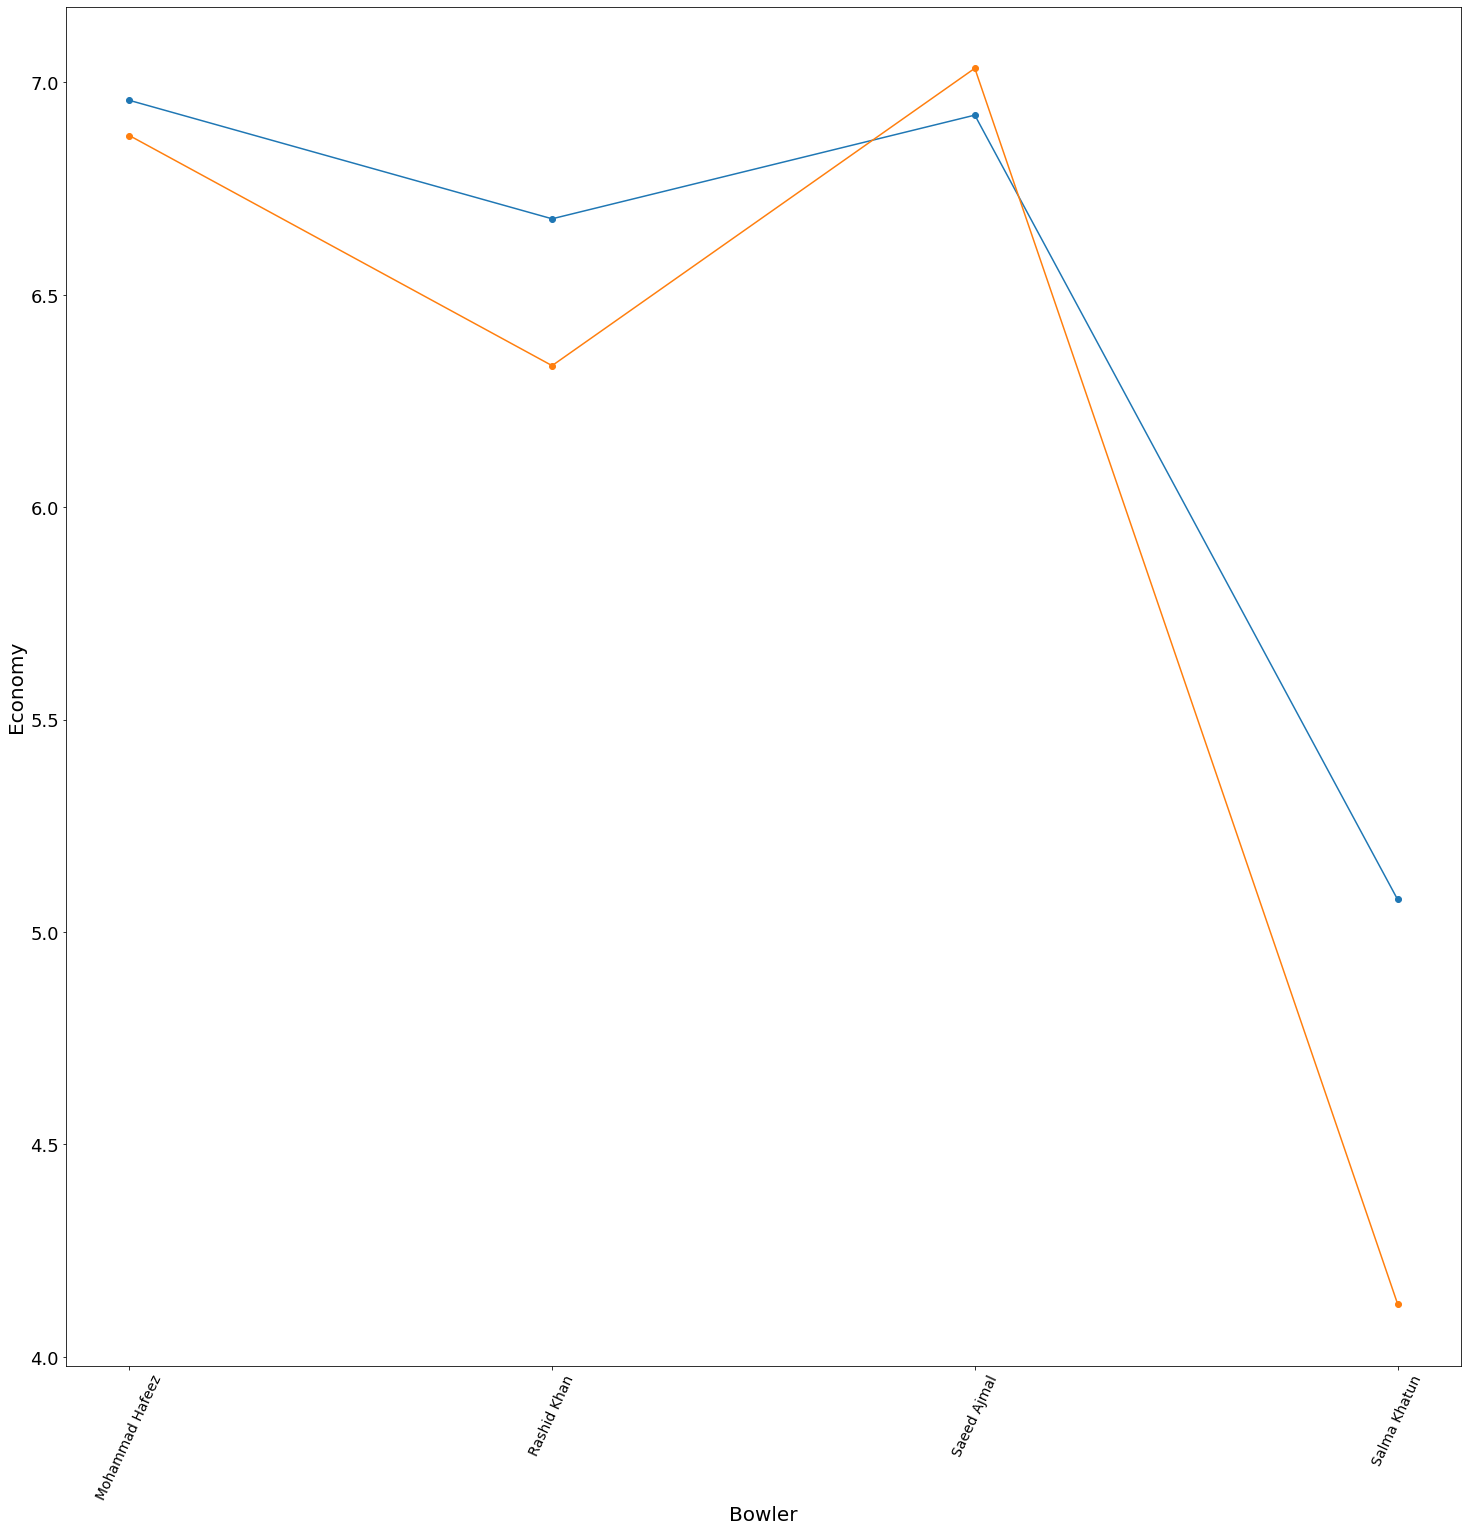

In [18]:
import matplotlib
from matplotlib import rc, rcParams

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ_knot, Bowlership_Econ_knot]:
    ax.scatter(Bowlers_x_knot, Y)
    plt.plot(Bowlers_x_knot, Y)
    
plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/T20I/nonpositive-bowlership-eco-scatter-t20i.png', dpi=300, bbox_inches='tight', transparent = True)


In [21]:
Bowlers_x = []
Bowlership_x = []
Bowler_Econ = []
Bowlership_Econ = []


from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:

        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())

        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d

        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        
        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha) and (be>bse):
        
            Bowlers_x.append(name)
            Bowlership_x.append(name + "-" + pname)
            Bowler_Econ.append(be)
            Bowlership_Econ.append(bse)
            

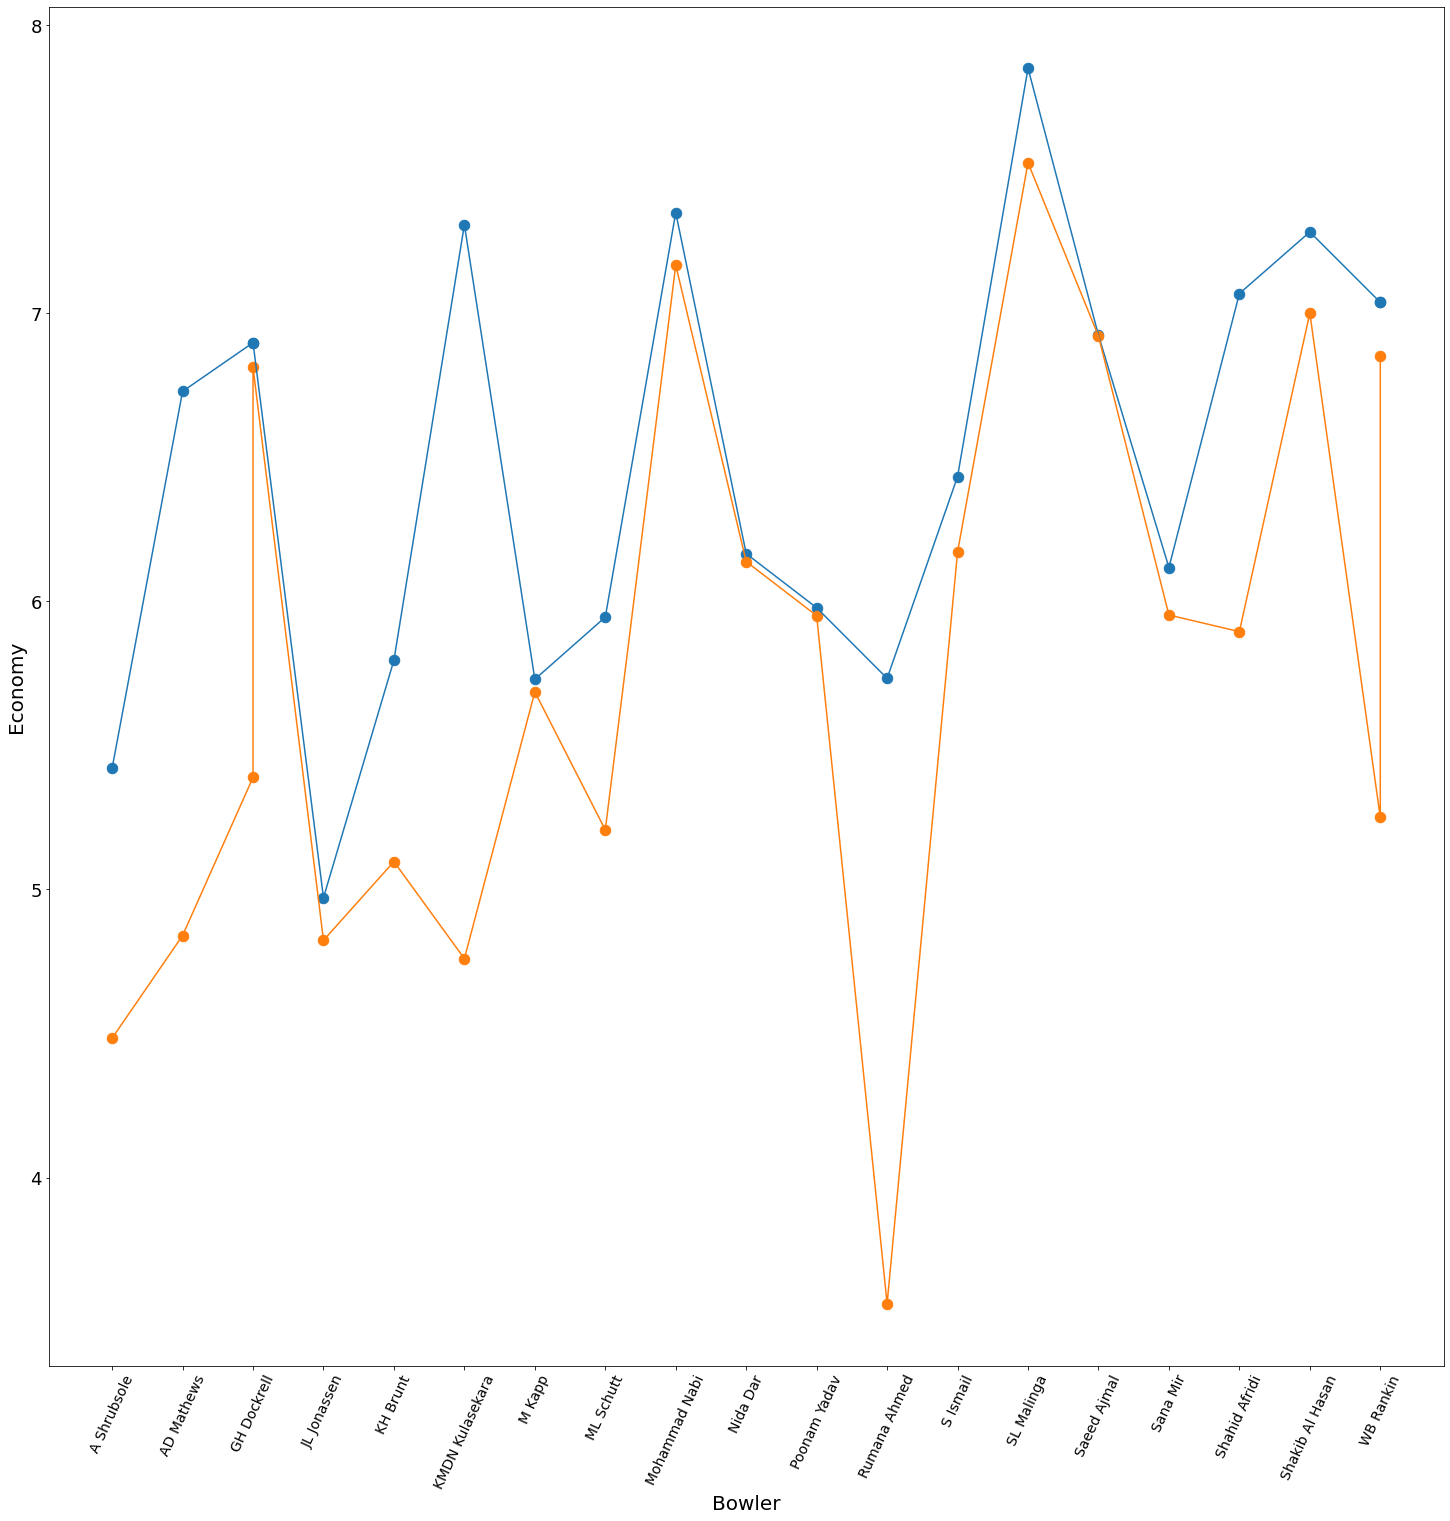

In [23]:
import matplotlib
from matplotlib import rc, rcParams

Bowler_set = list(set(Bowlers_x))
Econ_set = list(set(Bowler_Econ))

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ,Bowlership_Econ]:
    ax.scatter(Bowlers_x, Y, s=110)
    plt.plot(Bowlers_x, Y)

plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/T20I/bowlership-pos-eco-scatter-t20.png', dpi=300, bbox_inches='tight', transparent = True)
